<a href="https://colab.research.google.com/github/kumagaimasahito/Quluser/blob/main/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/kumagaimasahito/Quluser.git

  Cloning https://github.com/kumagaimasahito/Quluser.git to /tmp/pip-req-build-ringm0ru
  Running command git clone --filter=blob:none --quiet https://github.com/kumagaimasahito/Quluser.git /tmp/pip-req-build-ringm0ru
  Resolved https://github.com/kumagaimasahito/Quluser.git to commit 280d9db9d6fc9d96875bfef326bbe7433d7d0ed4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 20.8 MB/s eta 0:00:00
  Created wheel for Quluster: filename=Quluster-0.1.0-py3-none-any.whl size=16077 sha256=bdd1f7fa919fd54f9d1e4f9959750b6f54ede417b127ca3cbcdd529e1b09fb27
  Stored in directory: /tmp/pip-ephem-wheel-cache-mmh0rpbv/wheels/ad/e9/4e/5ac5cfdb579d0cf19157f1c0a46f7607bdca455429722882d5
Successfully built Quluster


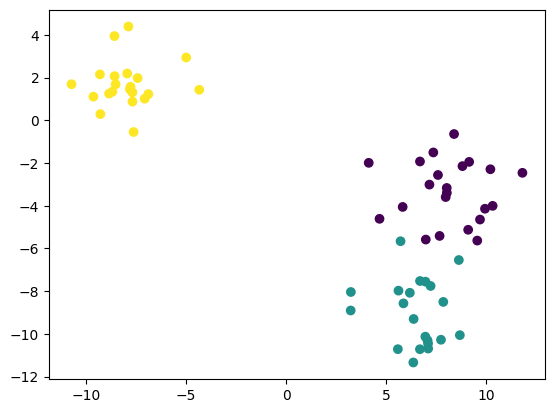

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def get_artificial_data(n_clusters, n_points):
    data, labels = make_blobs(random_state=6,
                                    n_samples=n_points,
                                    n_features=2,
                                    cluster_std=1.5,
                                    centers=n_clusters)
    return data, labels

data, labels_origin = get_artificial_data(n_clusters=3, n_points=64)

# 可視化
plt.scatter(data[:,0], data[:,1], c=labels_origin)
plt.show()

In [ ]:
from amplify import FixstarsClient
from datetime import timedelta

client = FixstarsClient()
client.token = ""
client.parameters.timeout = timedelta(milliseconds=1000)

In [ ]:
from Quluster import CombinatorialClustering

In [ ]:
cl = CombinatorialClustering(data=data, n_clusters=3)
cl.set_qubo()

In [ ]:
cl.solve(client)

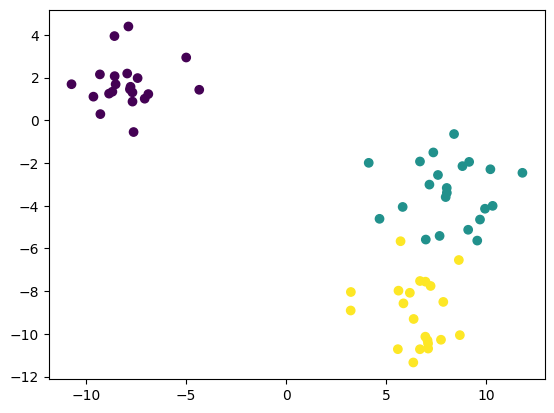

In [ ]:
plt.scatter(data[:,0], data[:,1], c=cl.labels)
plt.show()

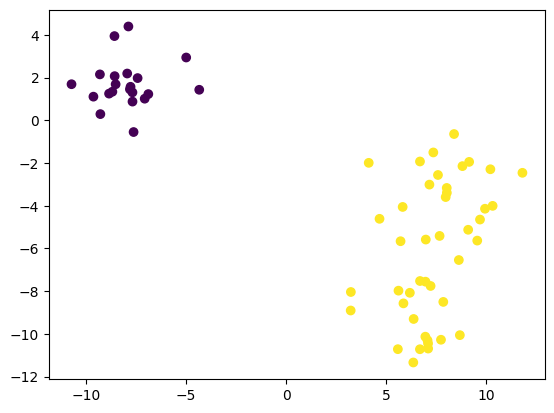

In [ ]:
from Quluster import BinaryClustering
bl = BinaryClustering(data=data)
bl.set_qubo()
bl.solve(client)
plt.scatter(data[:,0], data[:,1], c=bl.labels)
plt.show()

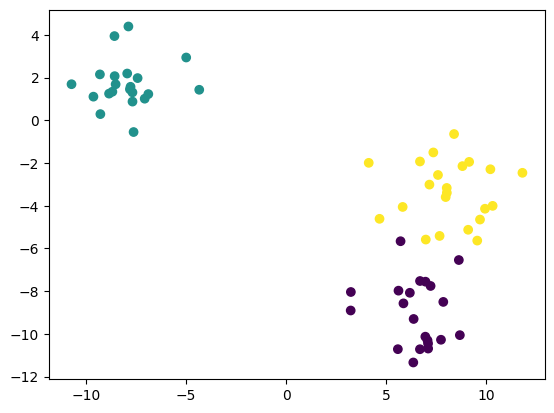

In [ ]:
from Quluster import ConsensusClustering
sl = ConsensusClustering(clusterings=[cl.labels, bl.labels], n_clusters=3)
sl.set_qubo(model="pairwise_similarity-based")
sl.solve(client)
plt.scatter(data[:,0], data[:,1], c=sl.labels)
plt.show()

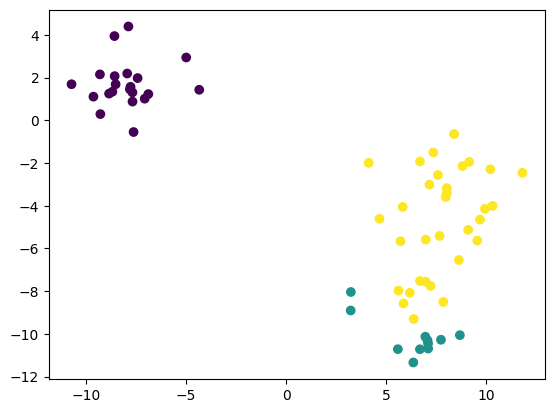

In [ ]:
from Quluster import ConstrainedClustering
cl = ConstrainedClustering(data=data, n_clusters=3)
cl.set_qubo()
cl.add_limited_sizes_to_qubo([21, 11, 32])
cl.solve(client)
plt.scatter(data[:,0], data[:,1], c=cl.labels)
plt.show()

In [ ]:
from sklearn.datasets import make_circles
data, labels = make_circles(n_samples=64, factor=0.3, noise=0.05, random_state=0)

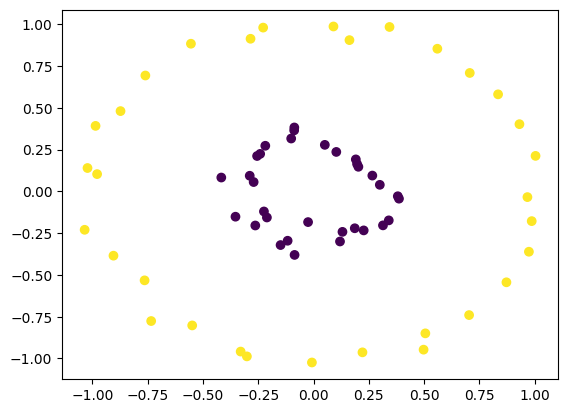

In [ ]:
from Quluster import KernelClustering
kernel = KernelClustering(data=data, n_clusters=2)
kernel.set_gaussian_matrix(sigma=0.2)
kernel.set_gram_matrix()
kernel.set_qubo()
kernel.solve(client)
plt.scatter(data[:,0], data[:,1], c=kernel.labels)
plt.show()